# TP Challenge

Replace your_name  by your name 

## Your task

Today you are a datascientist for a marketing saas company.
You have some data about your customer, a file with some features and the target **buy**.

The target variable is whether a customer will click 'Buy' on a website. Buy = 0 and Buy = 1 indicate 'no' and 'yes' respectively. Independent variables capture customer background and customer website navigation behavior information. First variable in the train.csv data file identifies each customer uniquely.

**The challenge is to correctly predict if a customer will click 'buy' on a website.**

## Importing Librairies

In [1]:
#import the librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import learning_curve
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

df_test = pd.read_csv('data/test.csv')
print(df_test)
df_train = pd.read_csv('data/train.csv')
print(df_train)

        Id  V2  V3  V4  V5  V6  V7  V8  V9  V10  ...  V77  V78  V79  V80  V81  \
0        5  40   1   4   2  10   1   4   1    4  ...    0    0    0    0    1   
1       14  41   1   3   3  10   0   5   0    4  ...    0    0    0    0    0   
2       16  33   1   2   3   8   0   7   0    2  ...    0    0    0    0    1   
3       26  33   1   3   3   8   0   6   1    2  ...    0    0    0    0    1   
4       28  40   1   3   3  10   0   3   0    6  ...    0    0    0    0    1   
...    ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...   
1710  5801  31   1   3   3   7   2   3   0    5  ...    1    0    0    0    1   
1711  5803   3   1   2   4   1   1   4   1    4  ...    0    0    0    0    0   
1712  5808  38   2   3   4   9   0   9   0    0  ...    0    0    0    0    1   
1713  5817   3   1   2   3   1   0   6   0    3  ...    0    0    0    0    0   
1714  5821  34   1   3   2   8   0   7   0    2  ...    0    0    0    0    0   

      V82  V83  V84  V85  V

## Preprocessing

- Check if missing values

- Check if duplicates ( if yes delete duplicated rows)

In [2]:
#your code here

#Check if missing value
missing_value_for_train = round(df_train.isnull().sum().sort_values(ascending=False)/len(df_train),2) 
print(missing_value_for_train)

#Check if duplicate
duplicate_count_for_train = len(df_train) - len(df_train.drop_duplicates())
print(duplicate_count_for_train)

Id     0.0
V56    0.0
V64    0.0
V63    0.0
V62    0.0
      ... 
V28    0.0
V27    0.0
V26    0.0
V25    0.0
Buy    0.0
Length: 87, dtype: float64
0


## Visualization 

- Check if you have outliers in each features (columns) using seaborn or matplotlib
- Check the correlation between each columns ( seaborn can maybe help you.. )[https://seaborn.pydata.org/generated/seaborn.pairplot.html]

- Plot the distribution of the target


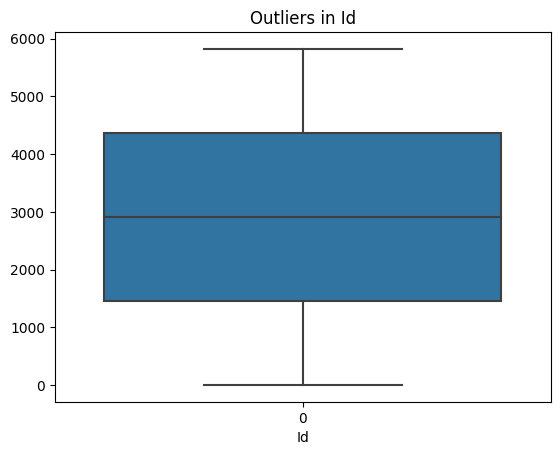

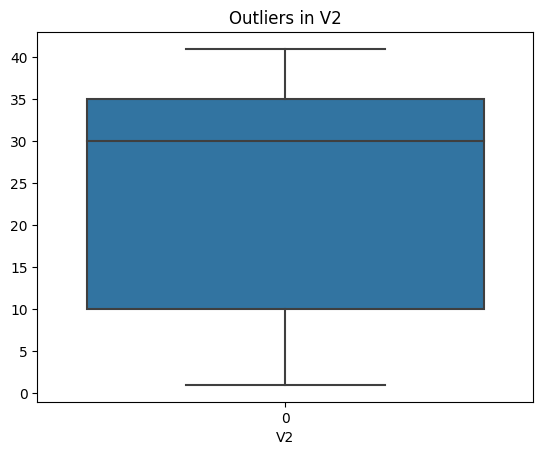

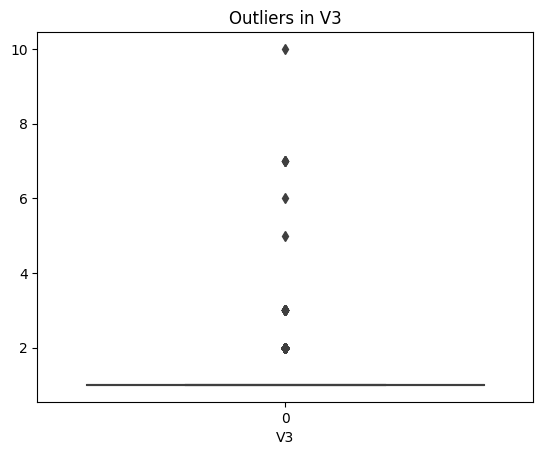

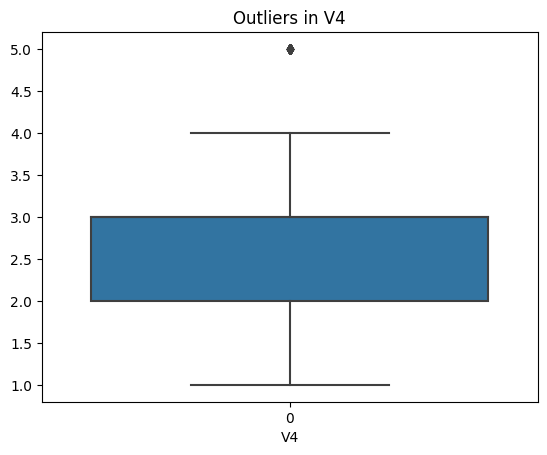

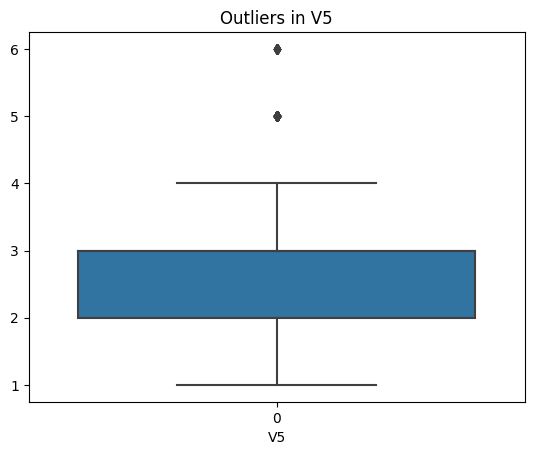

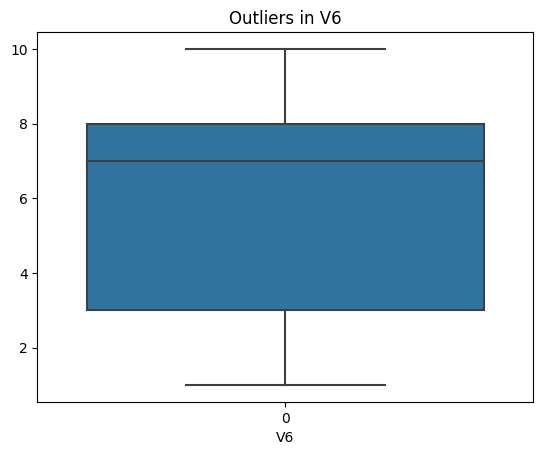

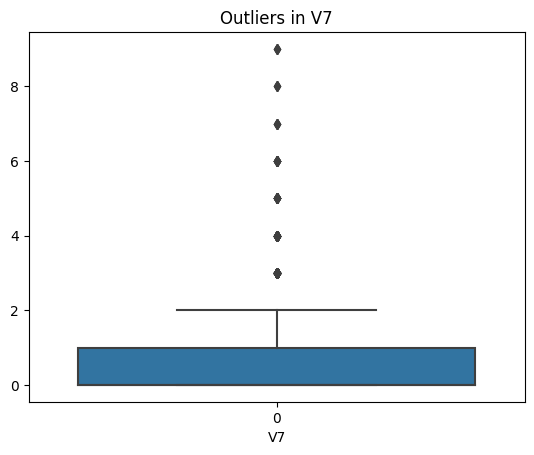

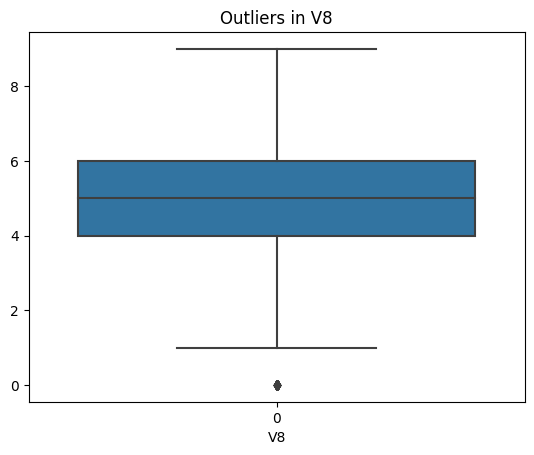

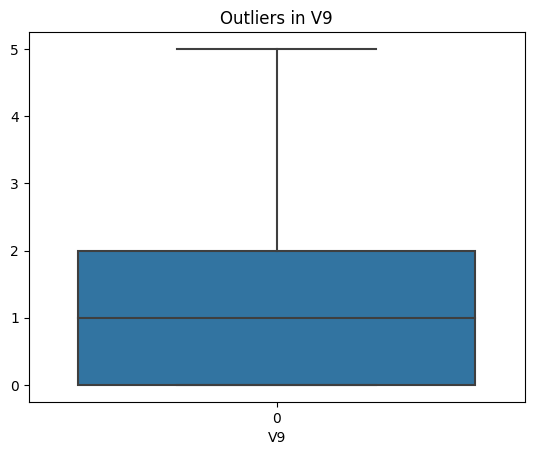

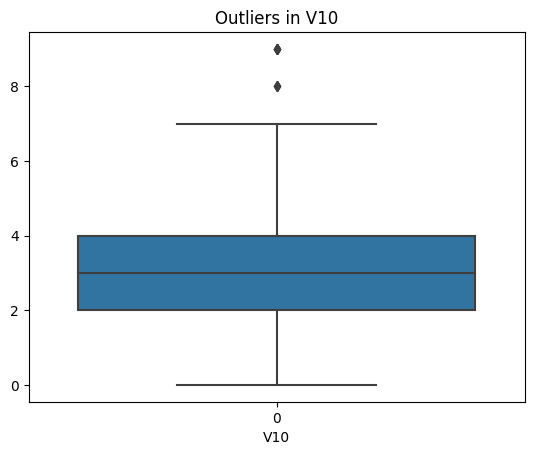

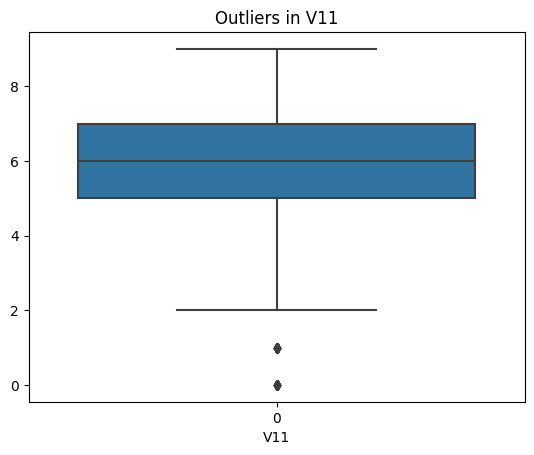

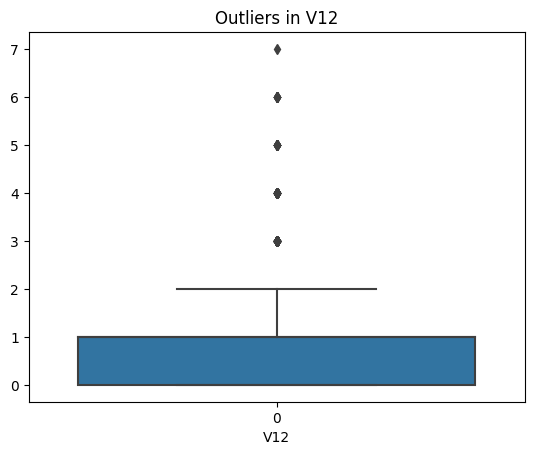

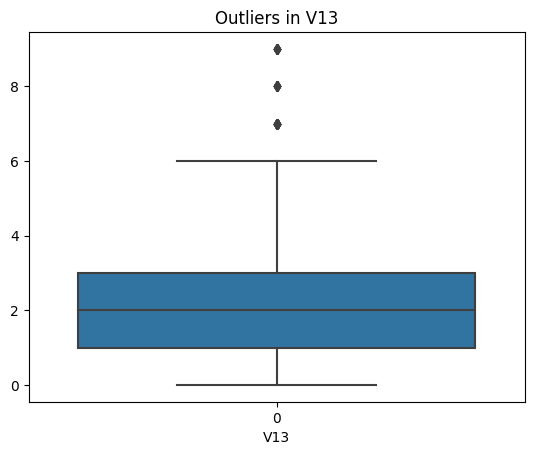

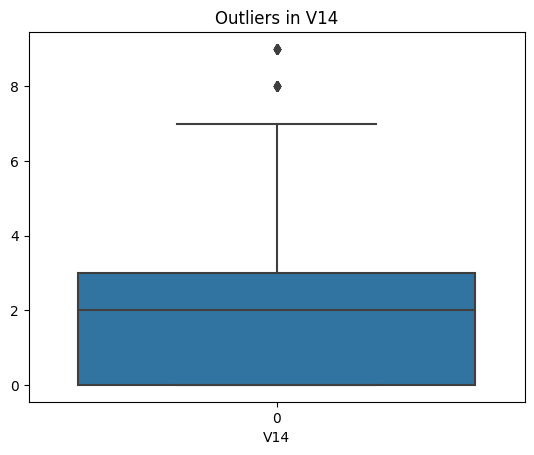

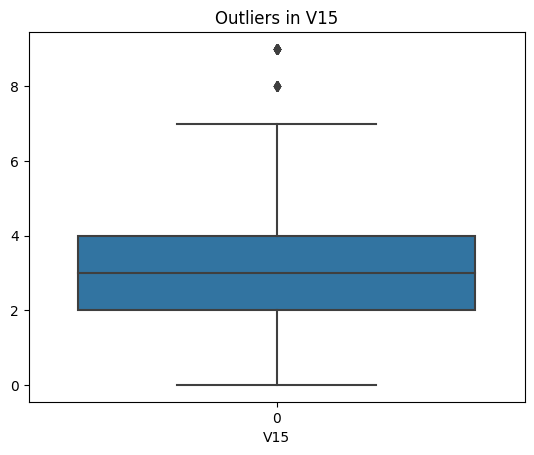

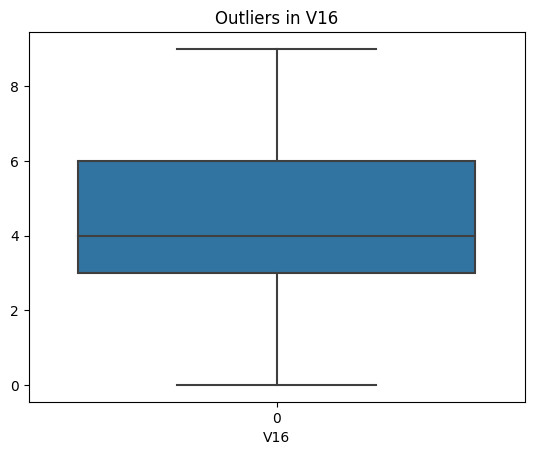

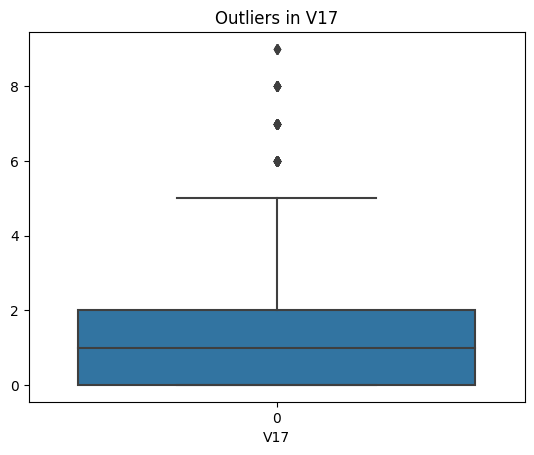

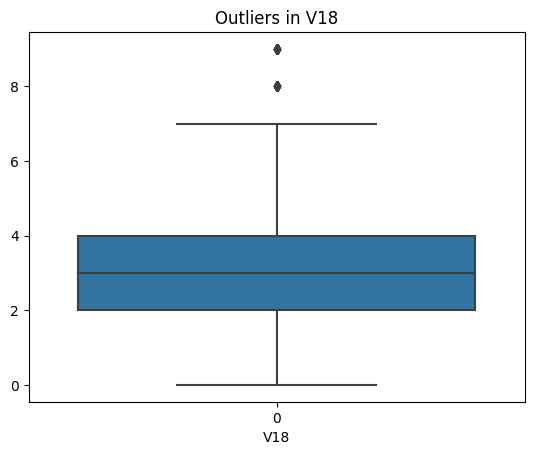

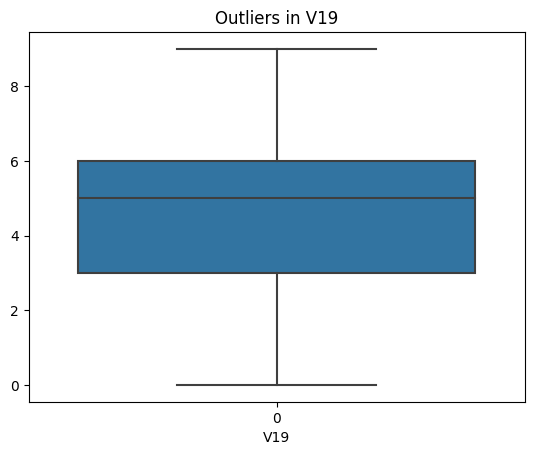

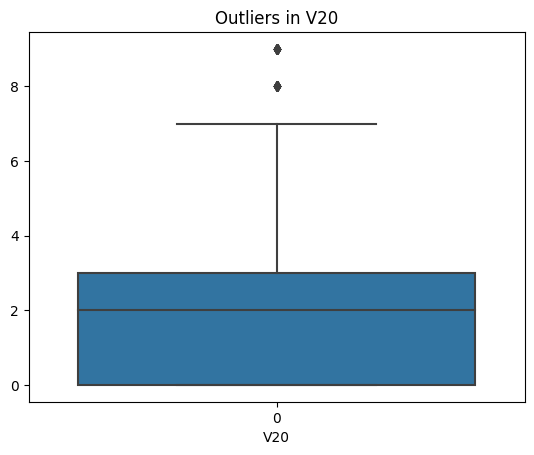

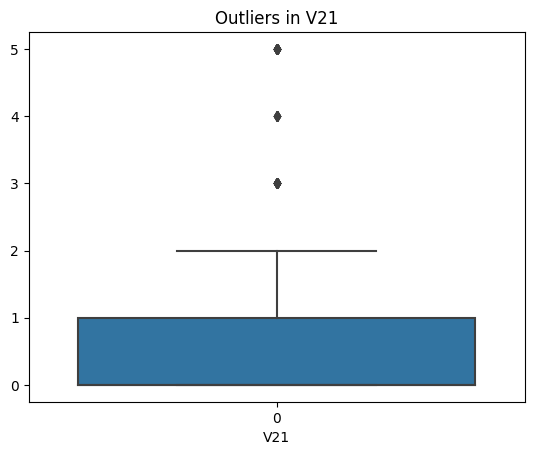

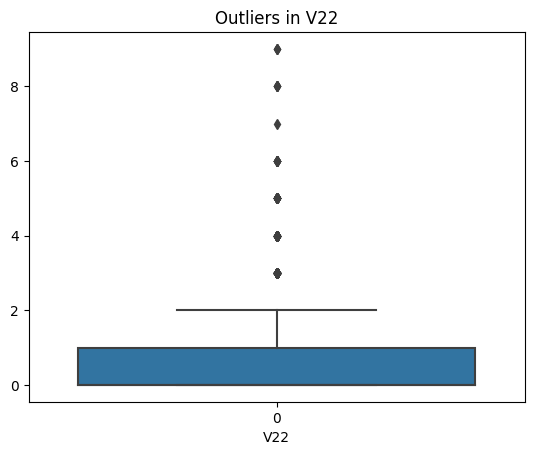

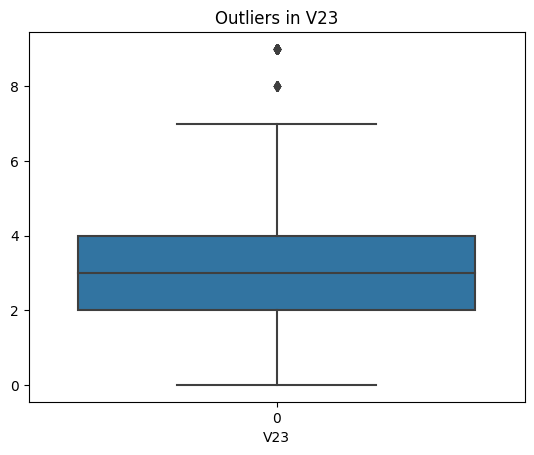

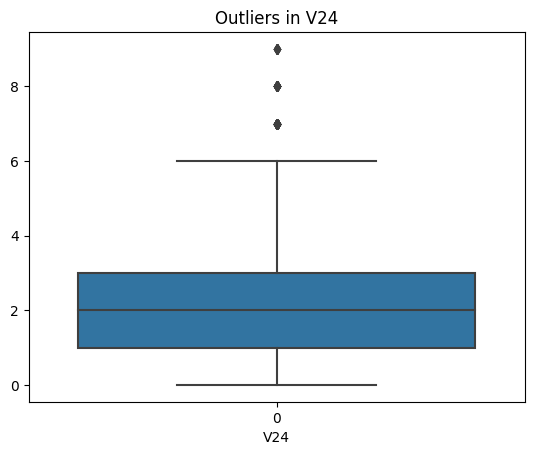

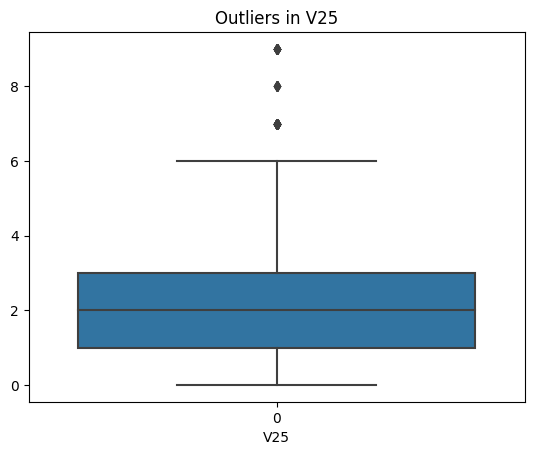

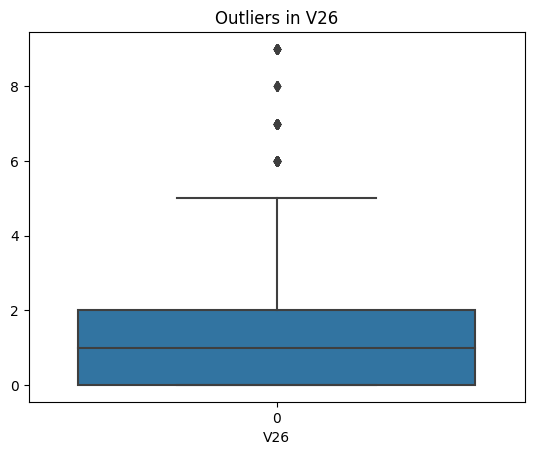

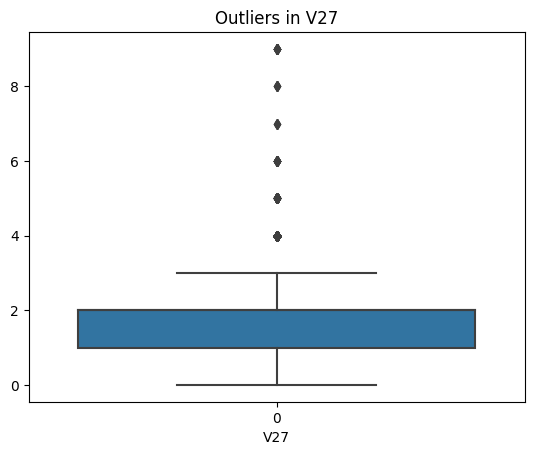

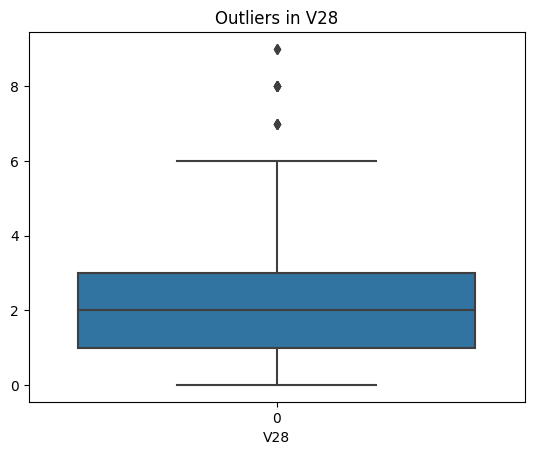

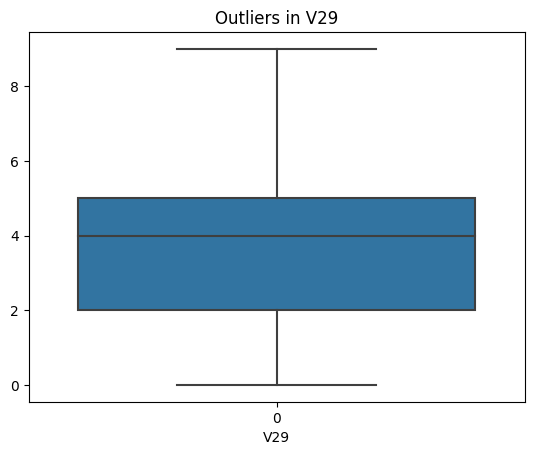

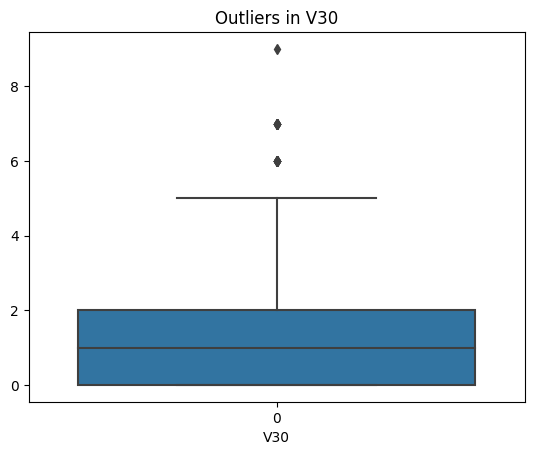

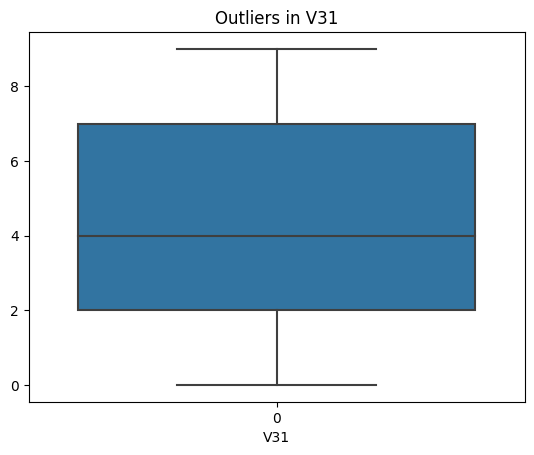

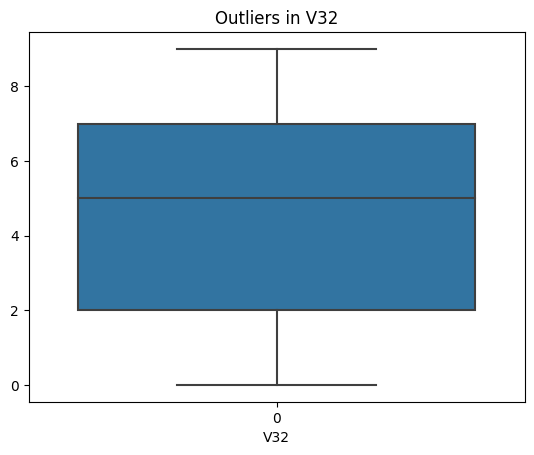

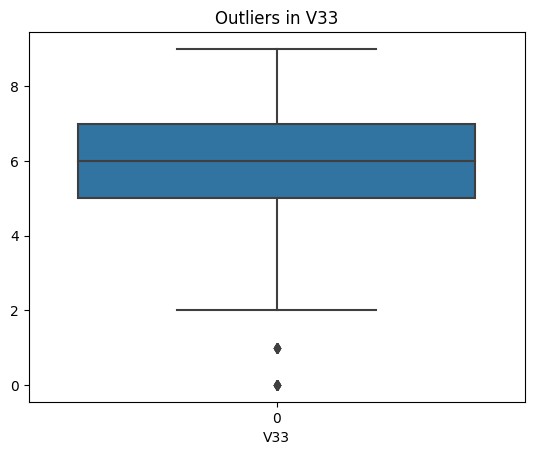

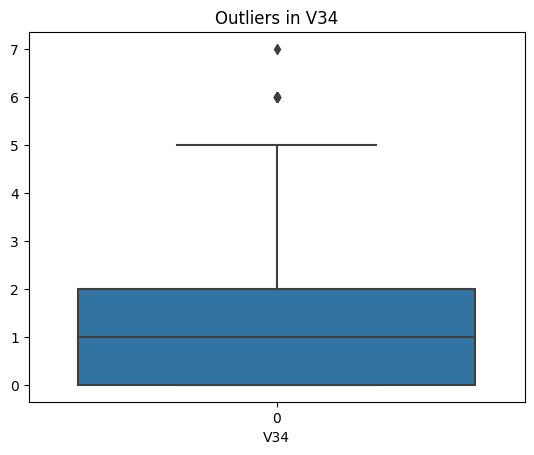

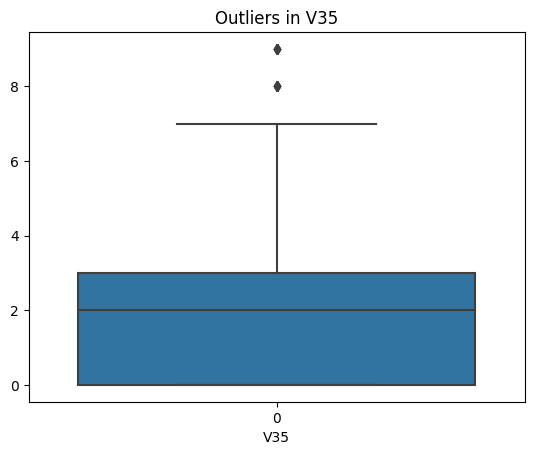

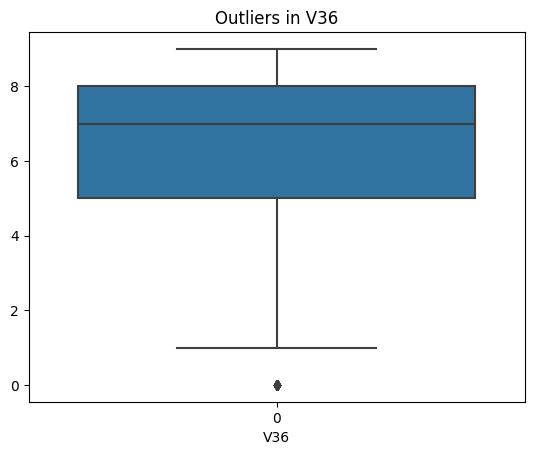

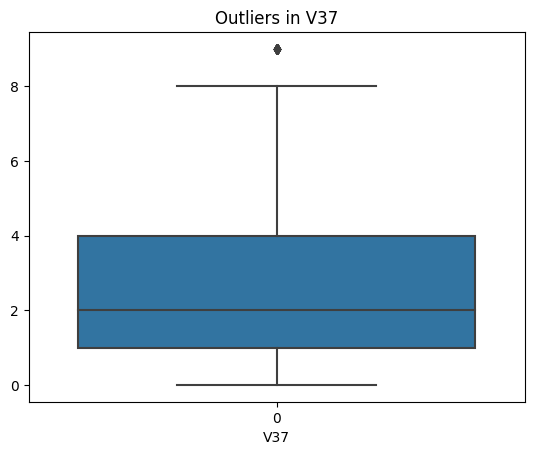

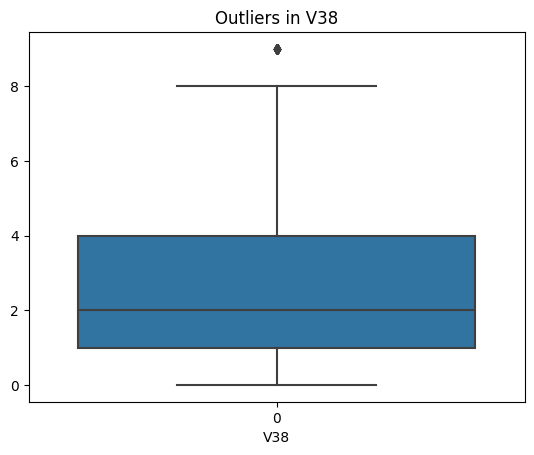

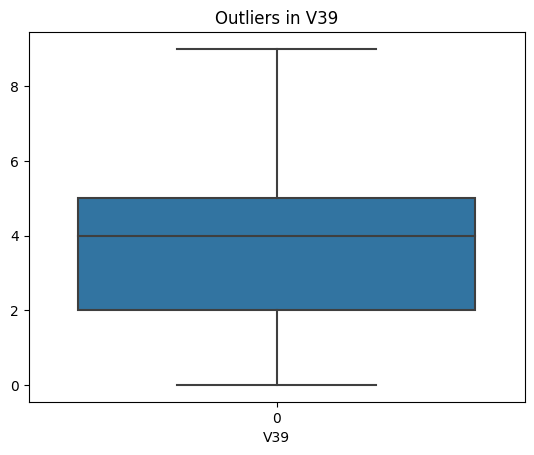

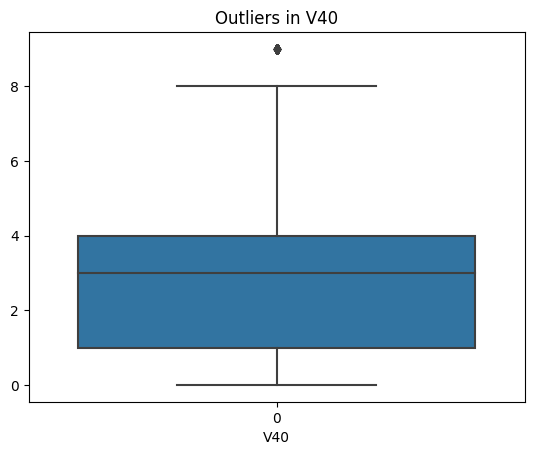

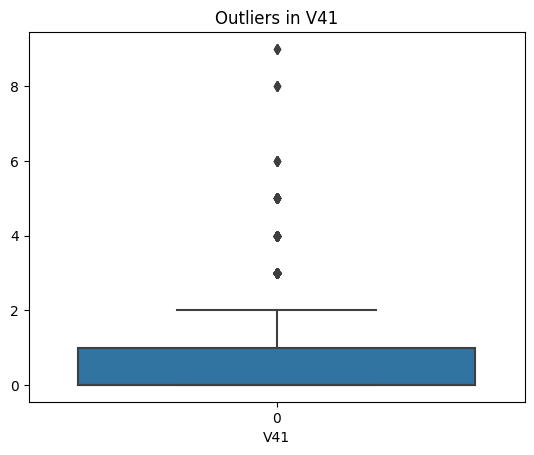

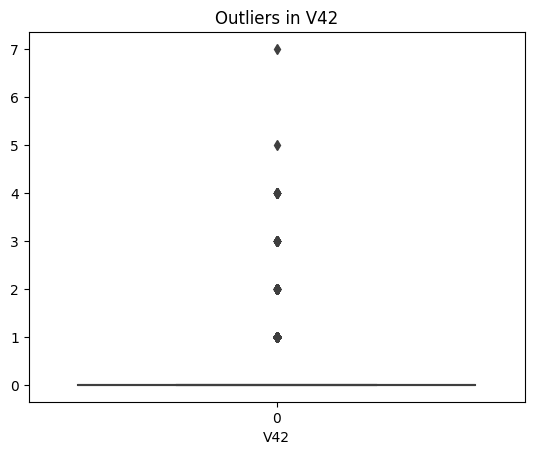

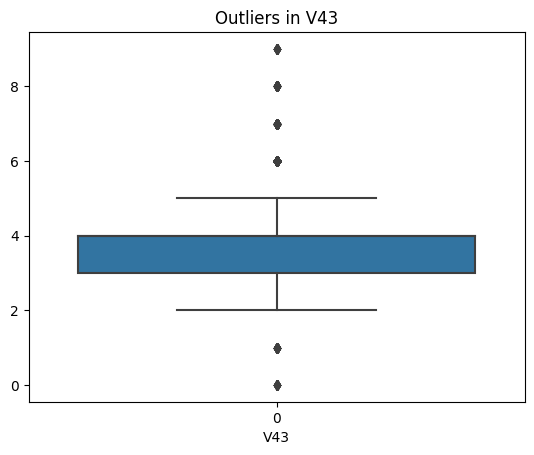

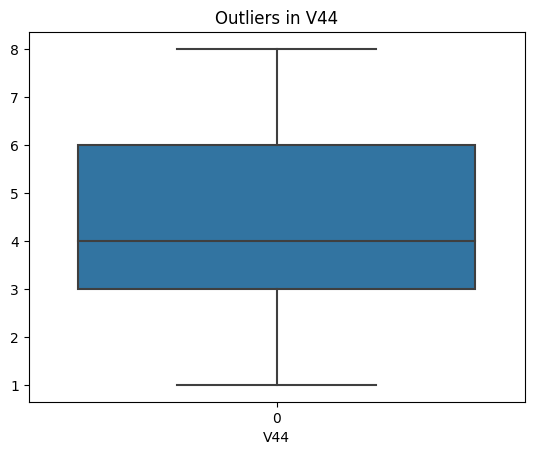

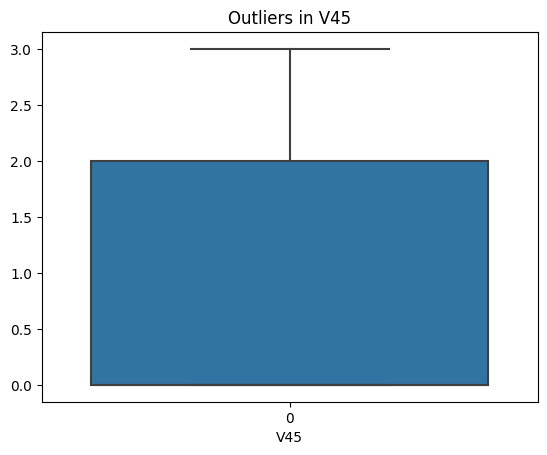

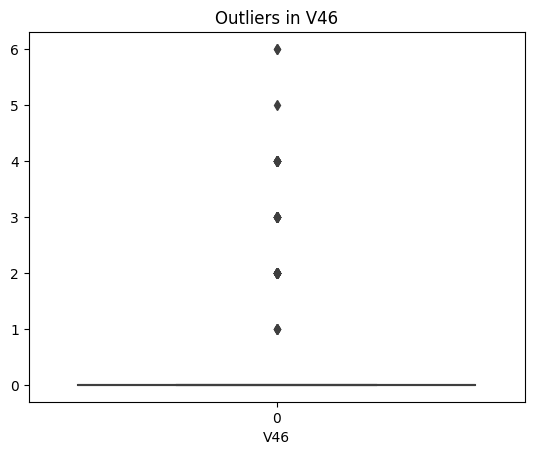

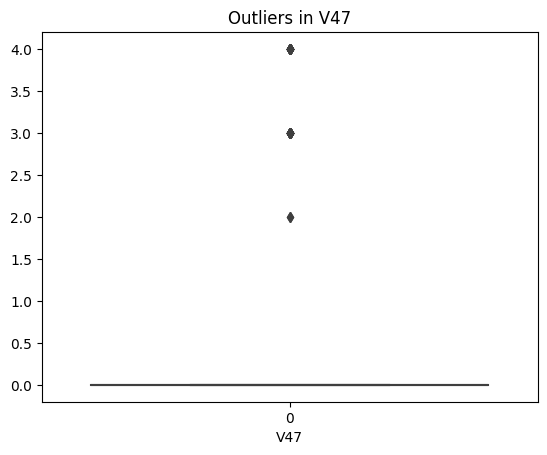

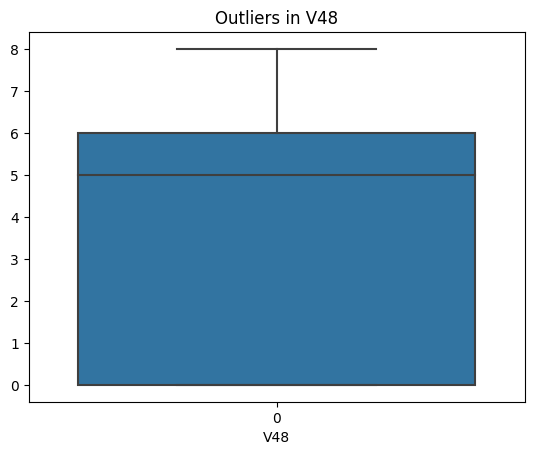

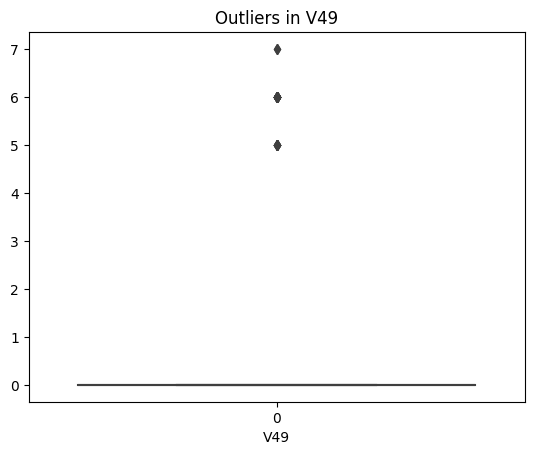

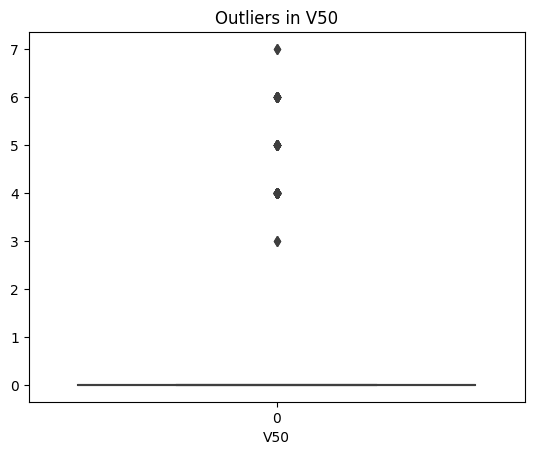

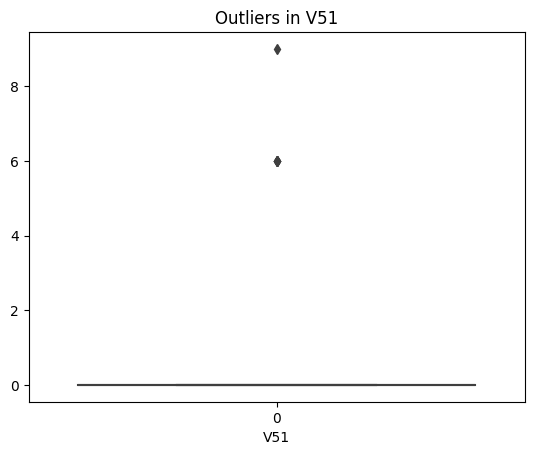

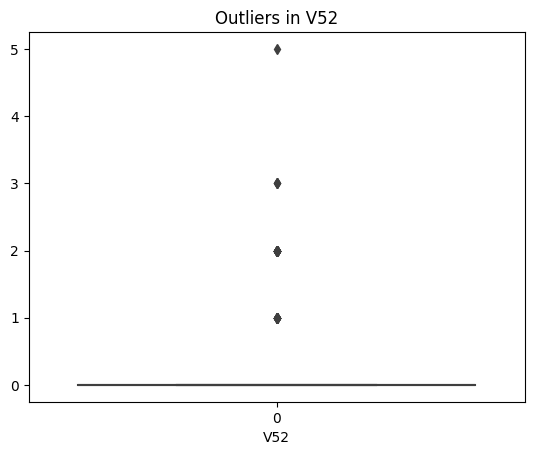

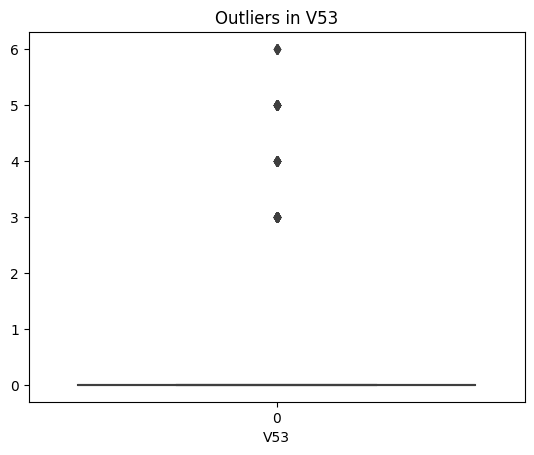

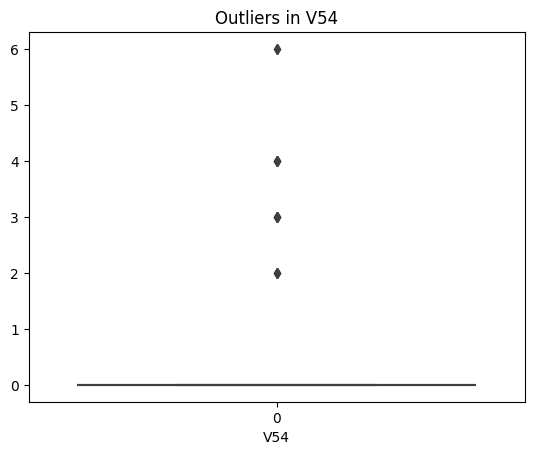

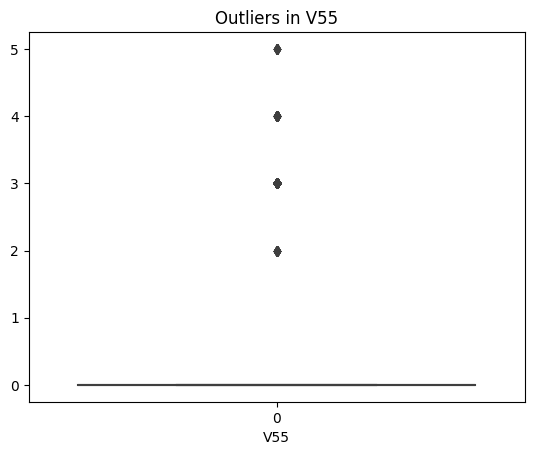

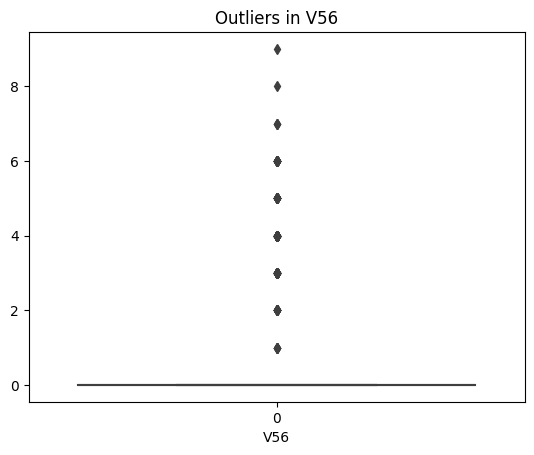

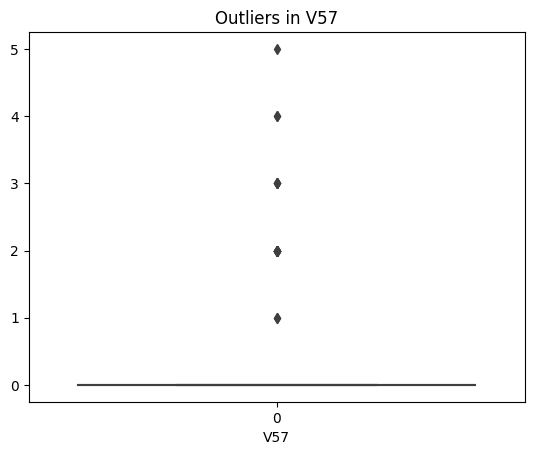

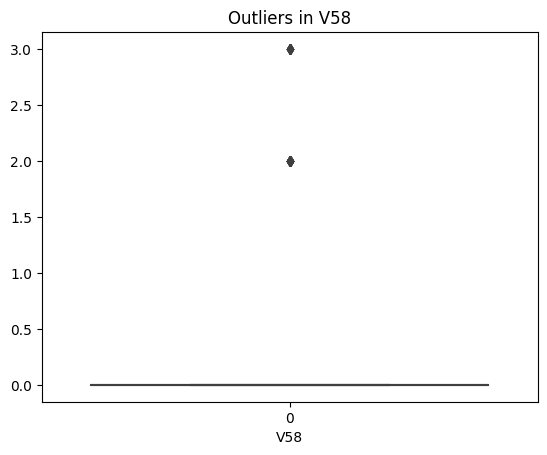

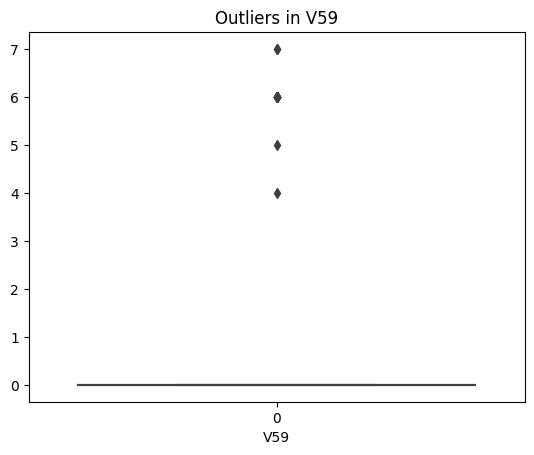

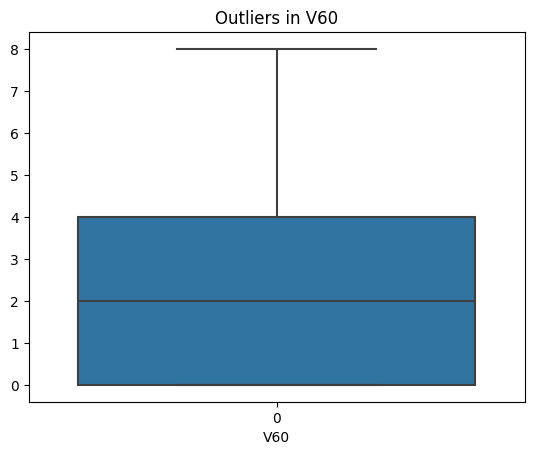

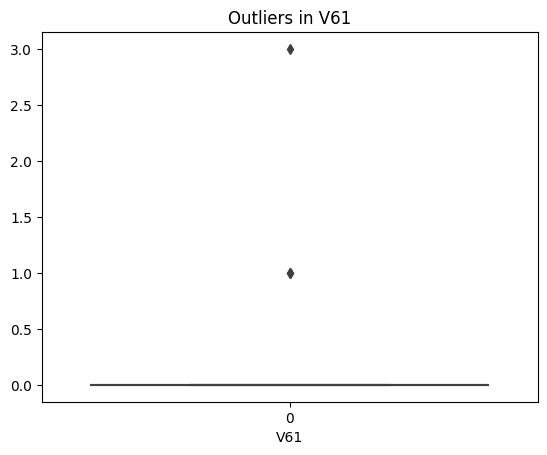

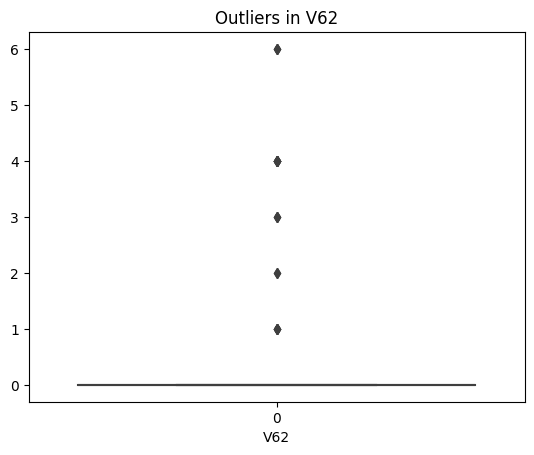

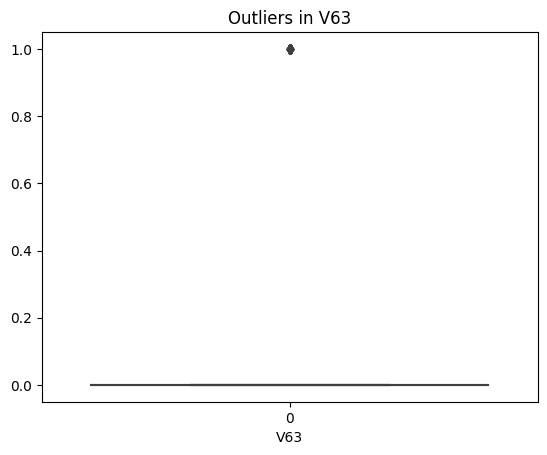

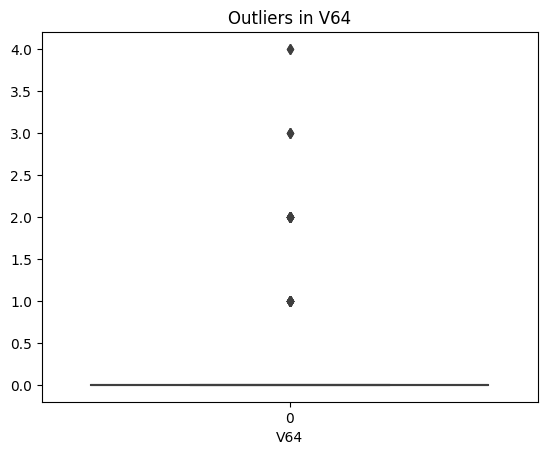

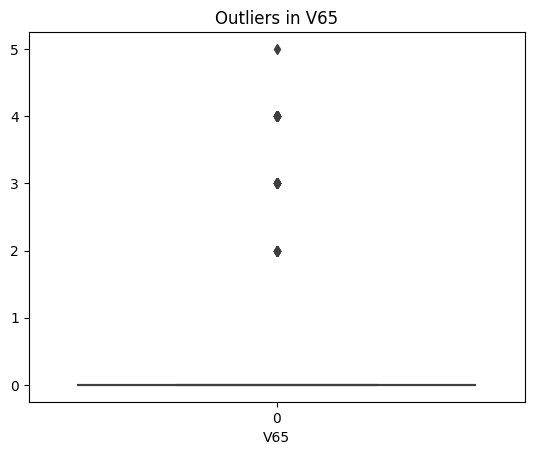

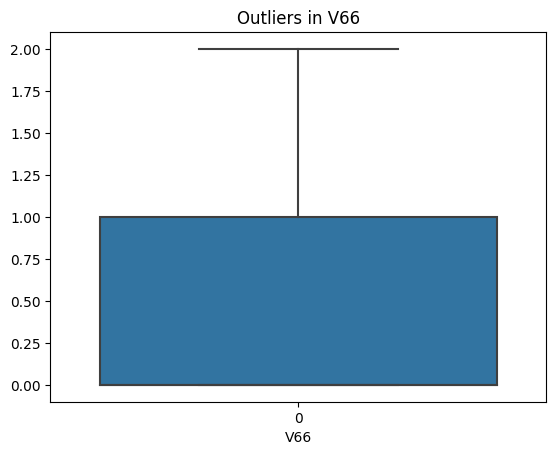

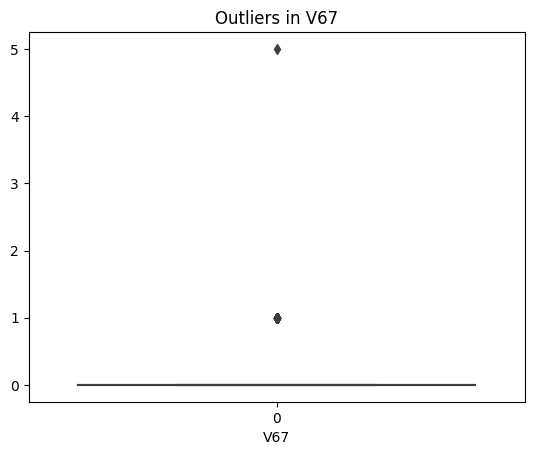

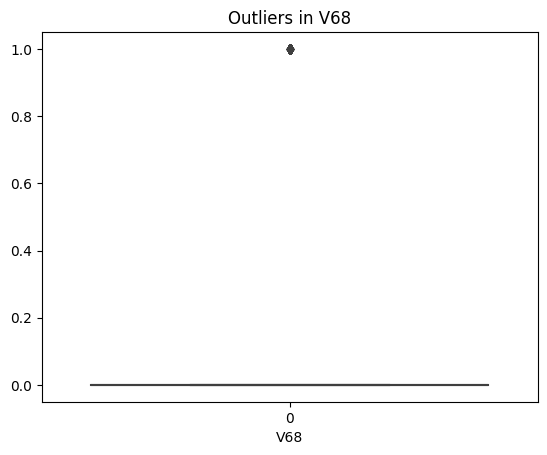

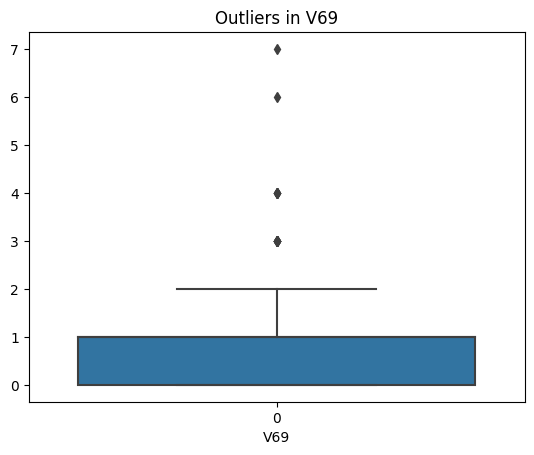

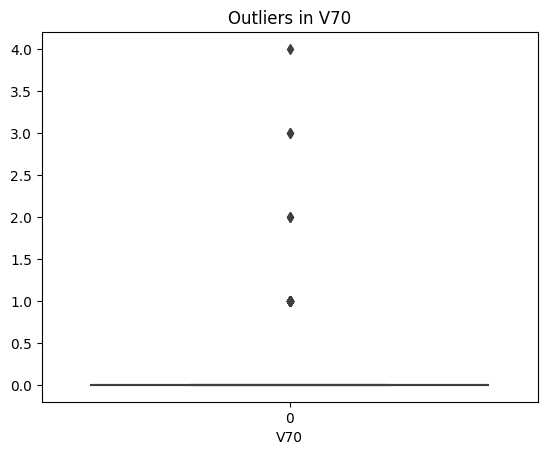

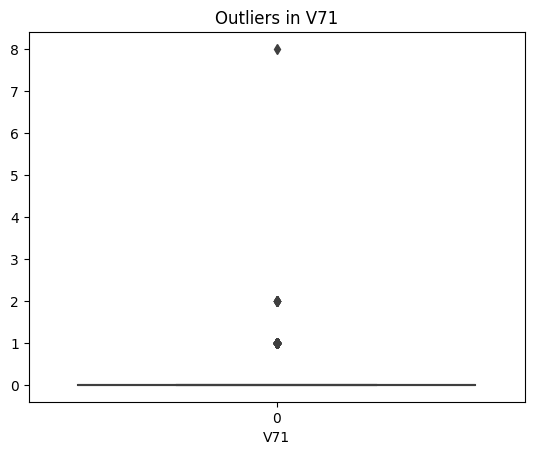

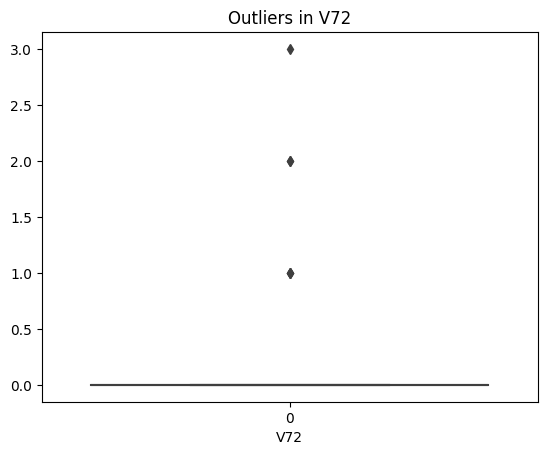

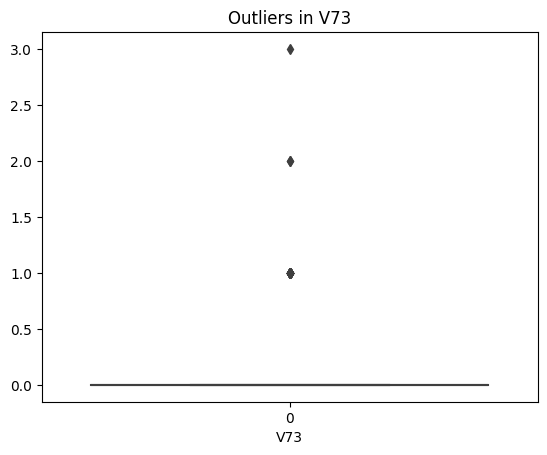

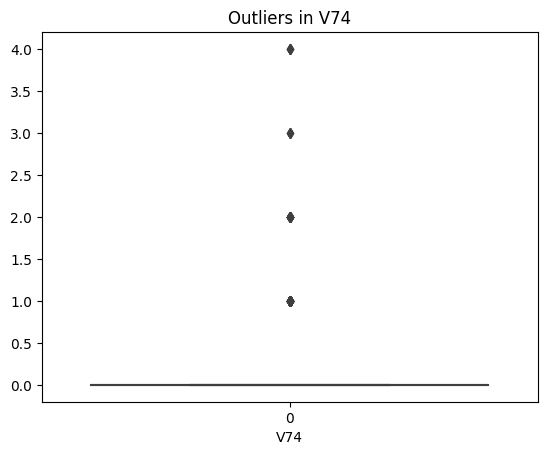

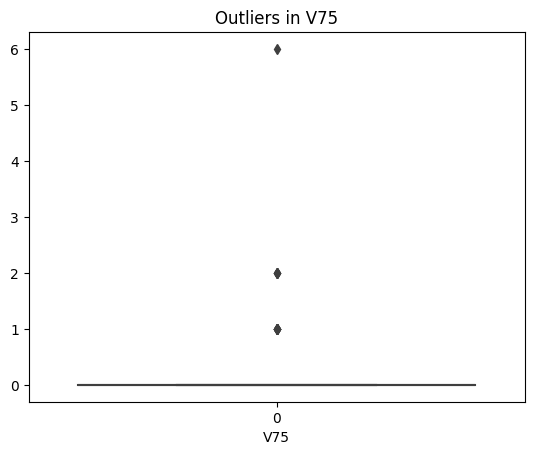

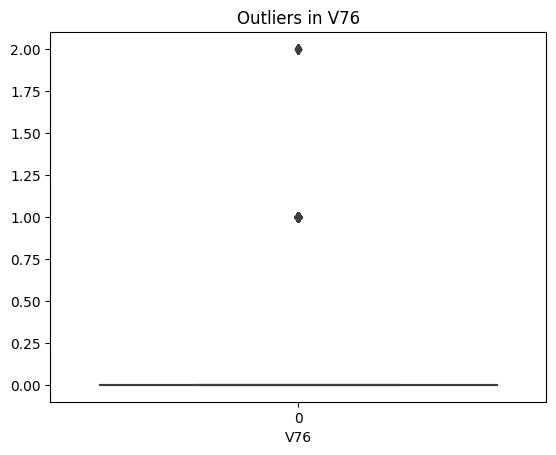

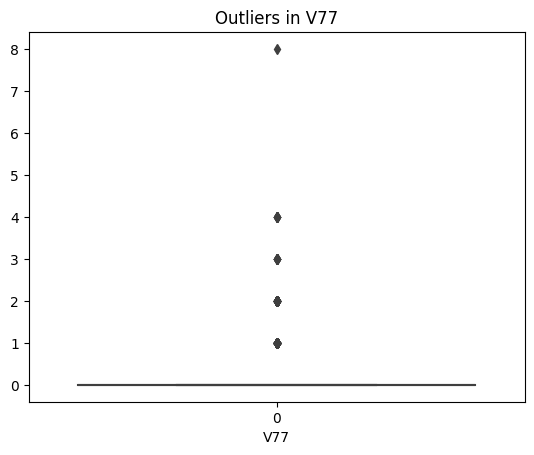

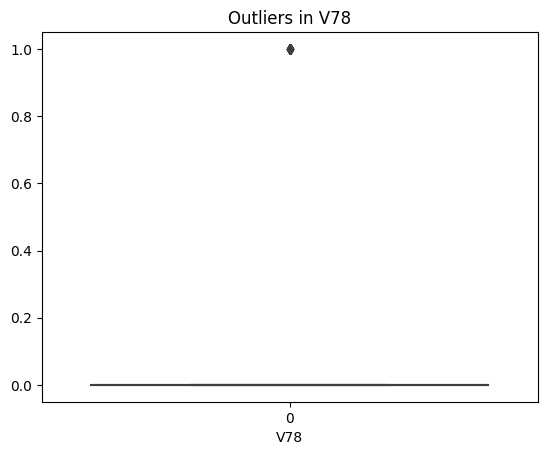

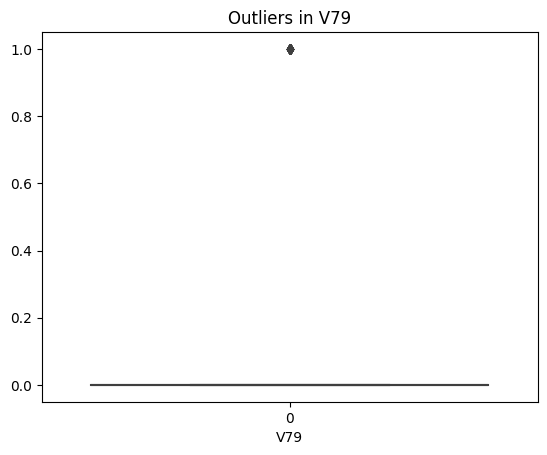

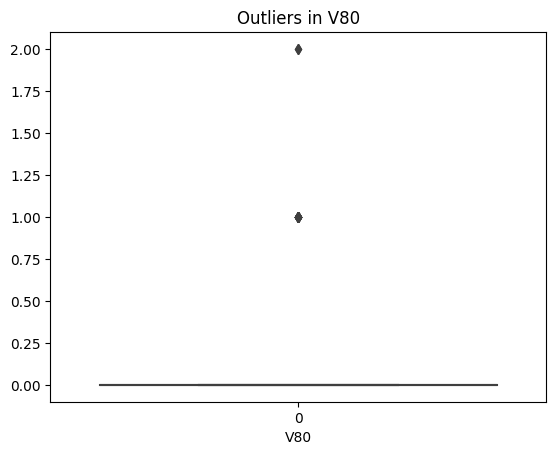

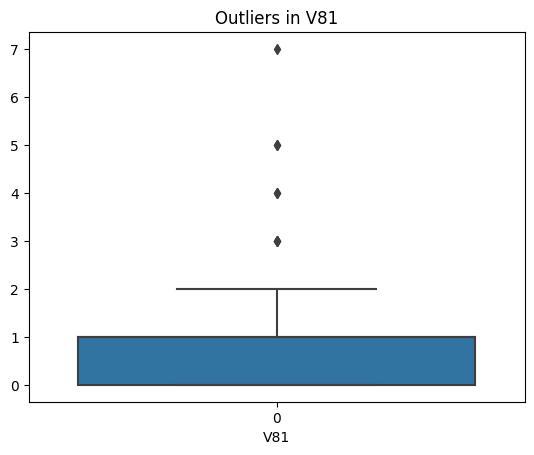

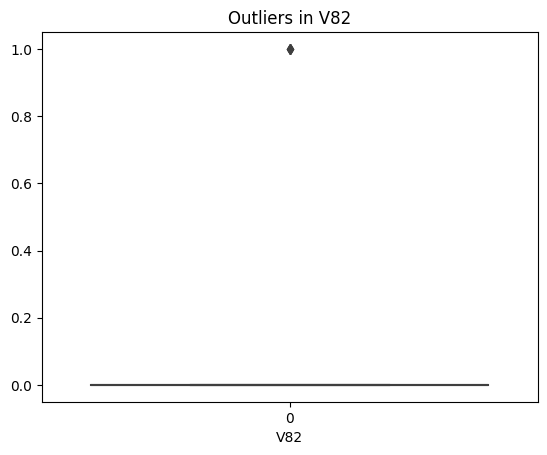

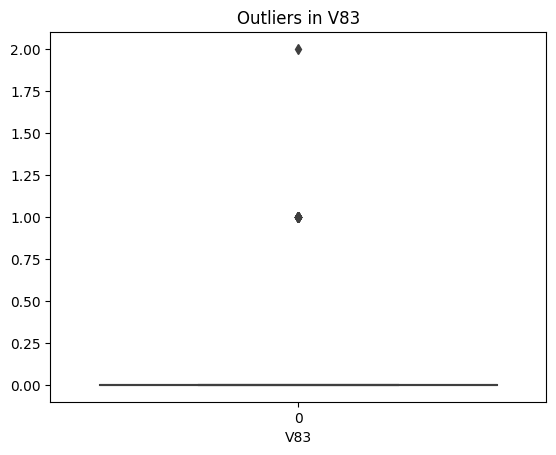

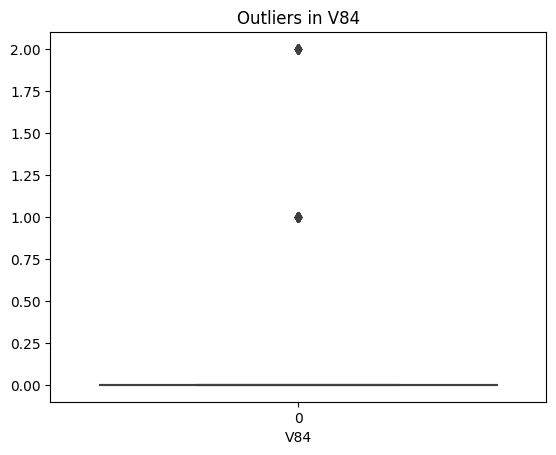

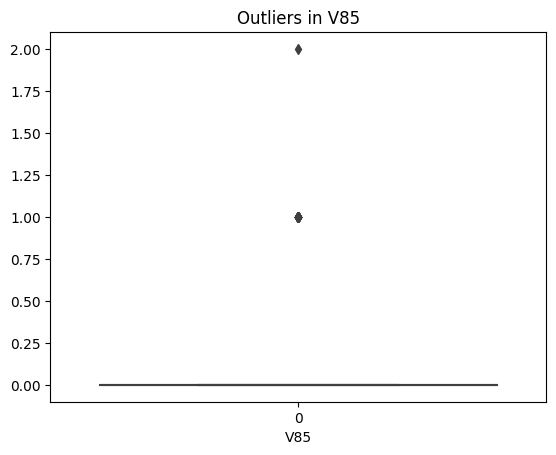

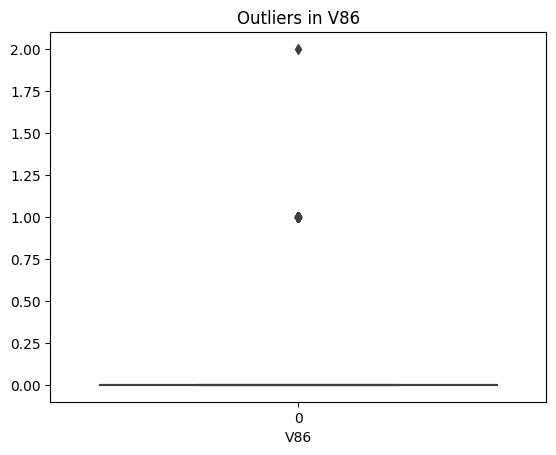

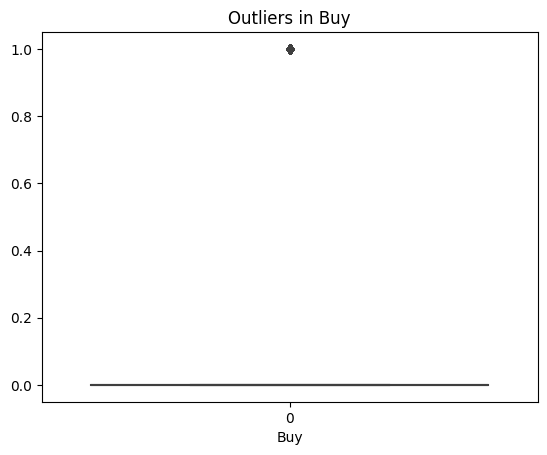

In [3]:
#Check outliers
for column in df_train.columns:
    fig, ax = plt.subplots()
    sns.boxplot(data=df_train[column], ax=ax)  
    ax.set_title(f"Outliers in {column}")
    ax.set_xlabel(column)
    plt.show()


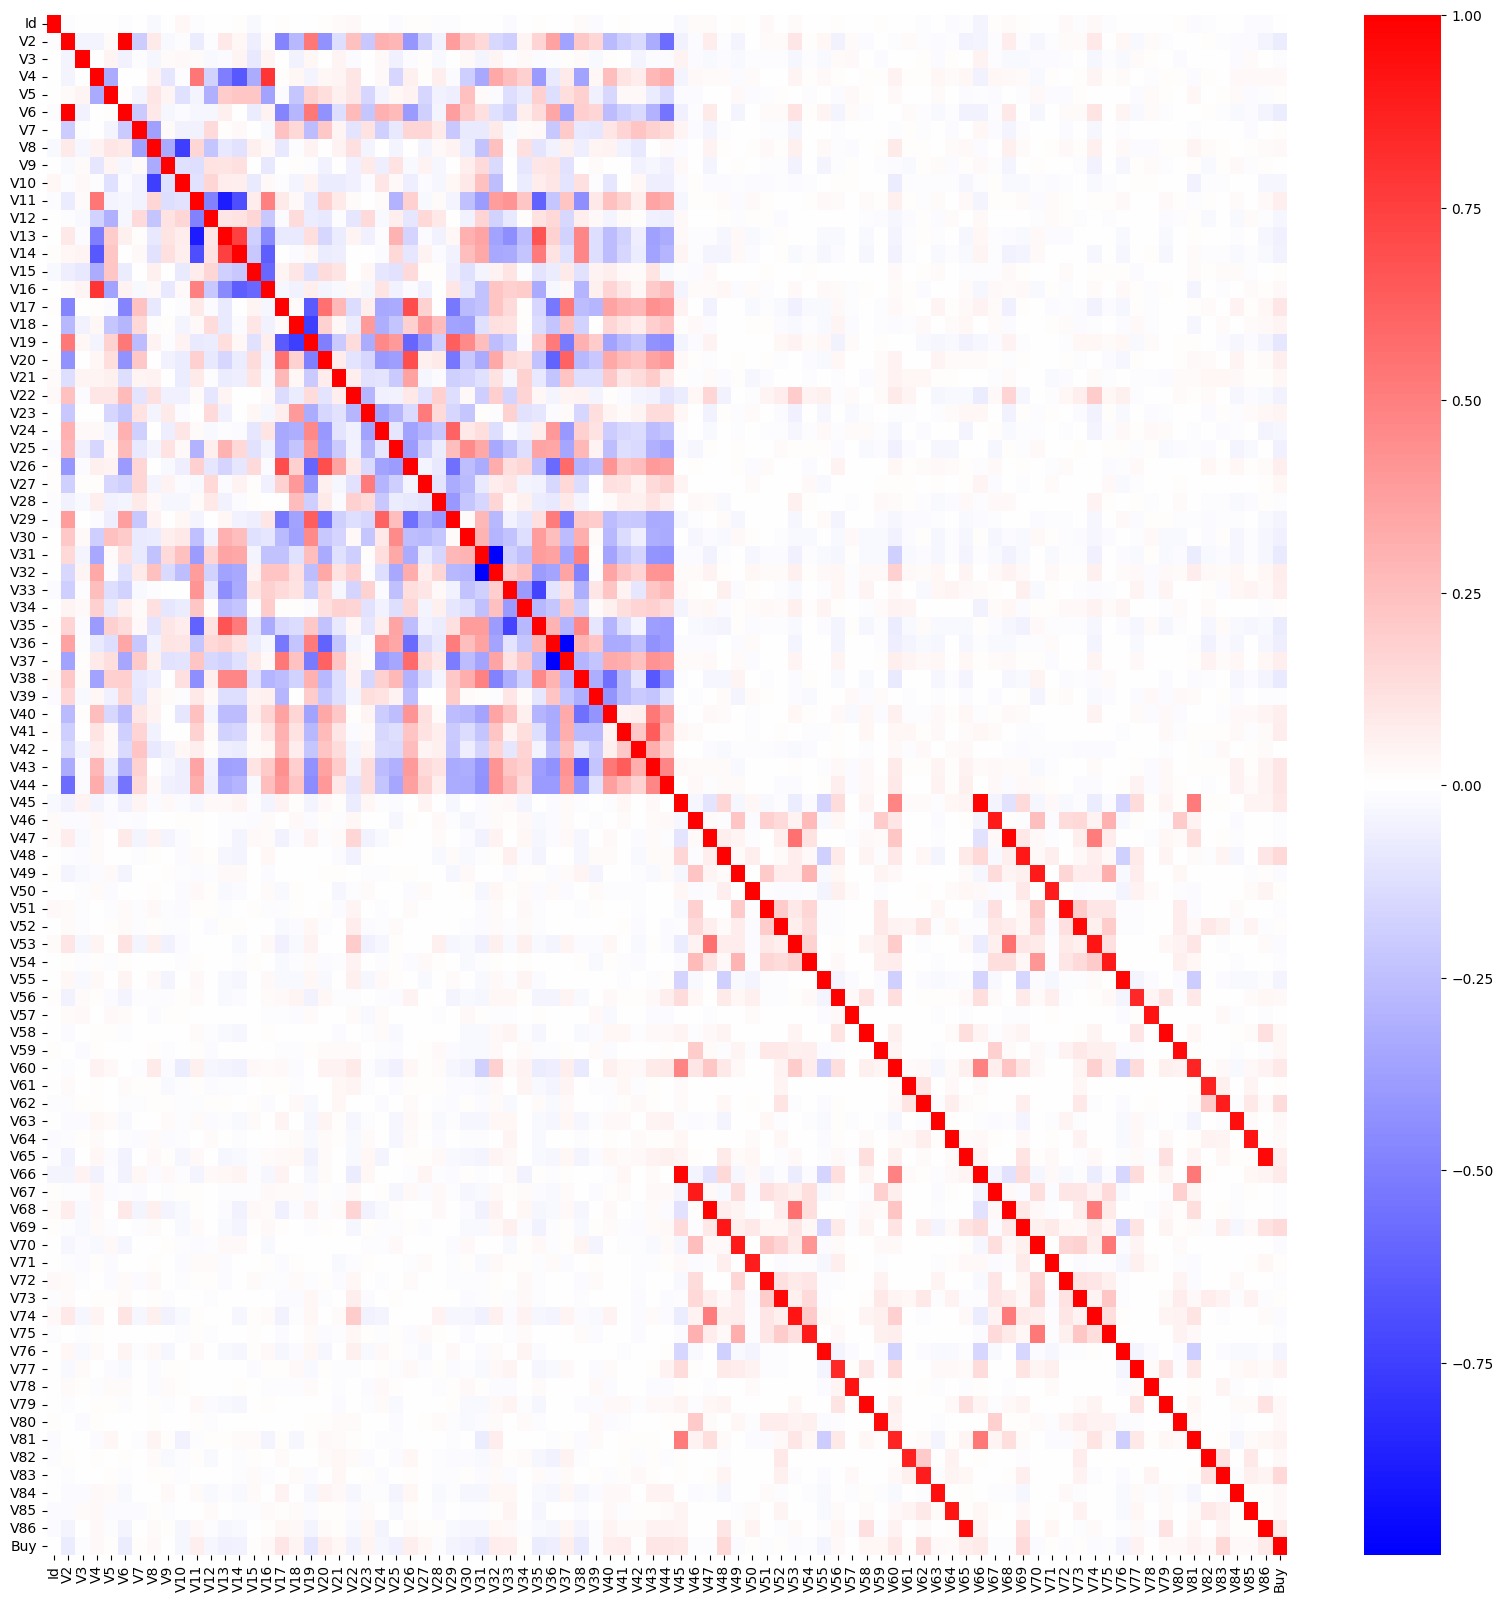

In [4]:
#check correlation
plt.figure(figsize=(20, 20))
corr_train = df_train.corr()

# Create a heatmap plot of the correlation matrix
sns.heatmap(corr_train, cmap='bwr')

# Show the plot
plt.show()

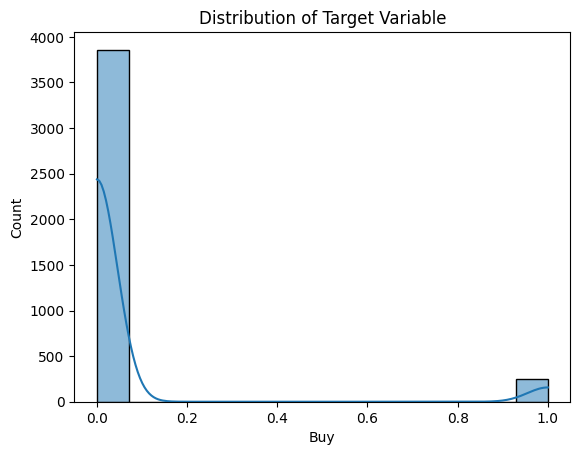

In [5]:
#Plot distribution target
sns.histplot(data=df_train, x='Buy', kde=True)
plt.xlabel('Buy')
plt.title('Distribution of Target Variable')
plt.show()

## Undersample your data

- Undersample the target with ( you may have to pip install -U imbalanced-learn)

from imblearn.over_sampling import RandomOverSampler, SMOTE

Ou 

from imblearn.under_sampling import RandomUnderSampler

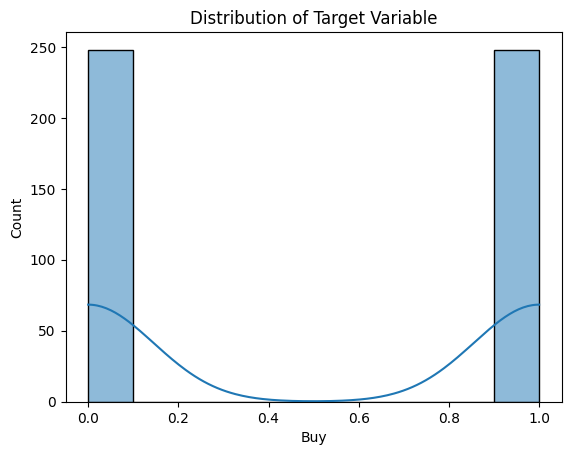

In [6]:
# your code here
rus = RandomUnderSampler()
train_x = df_train.drop(['Id', 'Buy'], axis=1)
train_y = df_train[['Buy']]
x_rus_train, y_rus_train = rus.fit_resample(train_x, train_y)
sns.histplot(data=y_rus_train, x='Buy', kde=True)
plt.xlabel('Buy')
plt.title('Distribution of Target Variable')
plt.show()

## Building models 

- Build a dummy model to have a baseline score

- Build a better model to classify your data and beat your baseline model

- Check the :
    - accuracy,
    - Recall,
    - Precision,
    - f1 score

- Plot your learning curve
--------------------------------









**⚠️(OPTIONAL)⚠️**
- Try to improve your first model by using a robust scaler or StandardScaler

- Try to use another  classifier model to improve your model performance

- Check the :
    - accuracy,
    - Recall,
    - Precision,
    - f1 score

- Plot your learning curve


0.4959677419354839
cross validate : 0.653
Accuracy: 0.4838709677419355
Recall: 0.4444444444444444
Precision: 0.5309734513274337
F1 Score: 0.48387096774193544


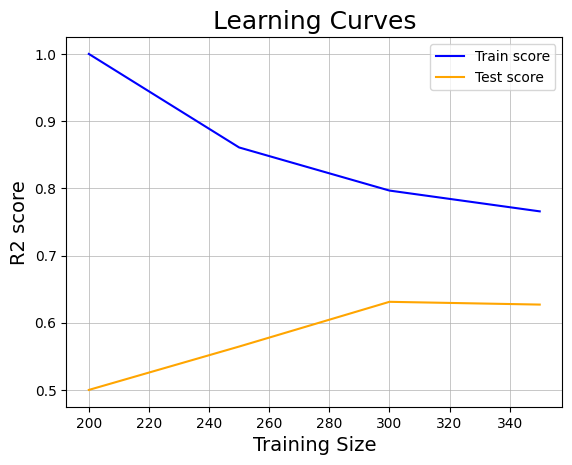

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_rus_train, y_rus_train, test_size=0.5)

dummy = DummyClassifier(strategy="stratified")

dummy.fit(x_train, y_train)
print(dummy.score(x_test, y_test))

y_pred = dummy.predict(x_test)

model = LogisticRegression(max_iter=1000)
model.fit(x_rus_train, y_rus_train.values.ravel())

print("cross validate :", cross_val_score(model, x_train, y_train.values.ravel(), cv=10).mean())

accuracy_score = accuracy_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_score)
print("Recall:", recall_score)
print("Precision:", precision_score)
print("F1 Score:", f1_score)

train_sizes = np.arange(50, 400, 50)
train_sizes, train_scores, test_scores = learning_curve(
    estimator = model,
    X = x_rus_train, 
    y = y_rus_train.values.ravel(), 
    train_sizes = train_sizes,
    cv = 5
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1) 

with plt.style.context('seaborn-deep'):
    ax = plt.gca()
    ax.plot(train_sizes, train_scores_mean, label = 'Train score',color='blue', markerfacecolor='blue', markersize=4)
    ax.plot(train_sizes, test_scores_mean, label = 'Test score',color='orange' ,markerfacecolor='#ffc125', markersize=4)
    ax.set_title('Learning Curves', fontsize = 18)
    ax.set_xlabel('Training Size', fontsize = 14)
    ax.set_ylabel('R2 score', fontsize = 14)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)
    ax.legend(loc="best")
    
    plt.show()


In [8]:
df_test_id_removed = df_test.drop('Id', axis=1)
print(pd.Series(model.predict(df_test_id_removed)).value_counts())

0    1091
1     624
dtype: int64


# Finish ?

add your code to a repos and send me the link by mail in the format :

the subject of the email will be **YOUR NAME | ML-IIM-challenge**

Send it to magloire.ndabagera@gmail.com at 5pm max.